In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('BankMarketingDataSet.csv', sep = ';')

In [ ]:
df

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,no
4115,4116,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,no
4116,4117,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,no
4117,4118,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
df.isnull().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
emp.var.rate,0
cons.price.idx,0


In [ ]:
df['y'].value_counts()

,count
y,
no,3668
yes,451


<Axes: >

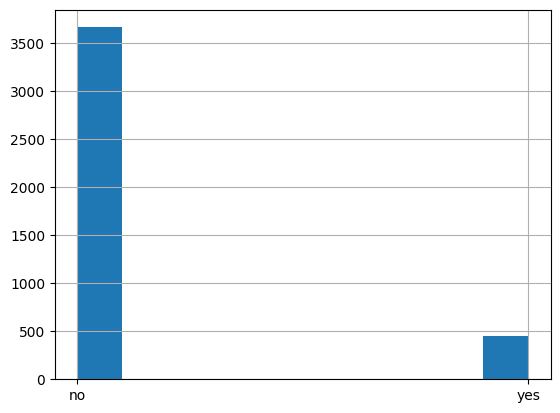

In [ ]:
df['y'].hist()

<Axes: >

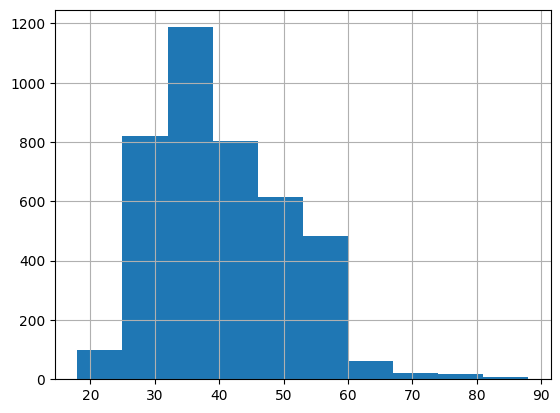

In [ ]:
df['age'].hist()

In [ ]:
pivot = pd.pivot_table(data = df,
                       index = 'marital',
                       columns = 'y',
                       values = 'id',
                       aggfunc = 'count',
                       margins = True,
                       margins_name = 'Total')
pivot['percentage of no'] = pivot['no']/pivot['Total']*100
pivot

y,no,yes,Total,percentage of no
marital,,,,
divorced,403,43,446,90.358744
married,2257,252,2509,89.956158
single,998,155,1153,86.556808
unknown,10,1,11,90.909091
Total,3668,451,4119,89.050740


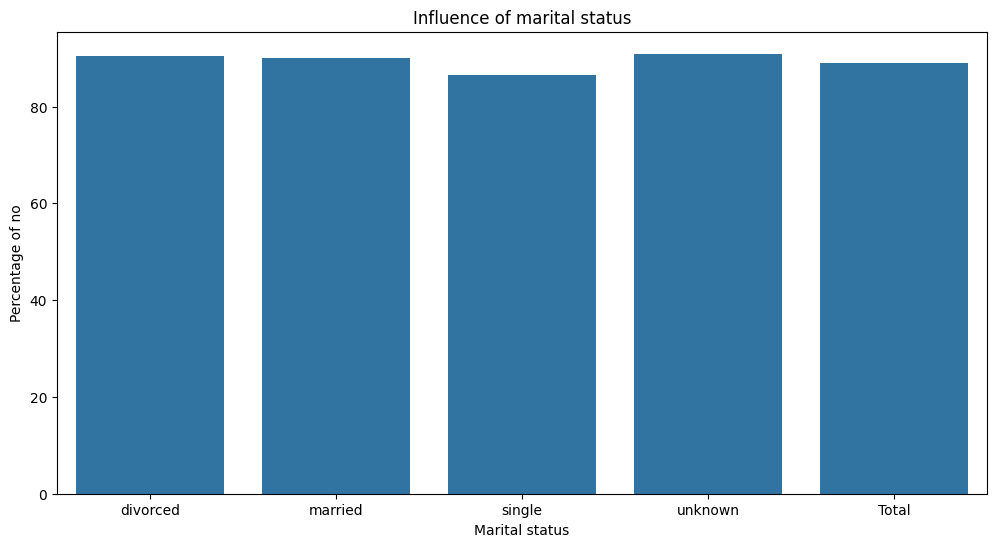

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))
sns.barplot(data = pivot, x = 'marital', y = 'percentage of no')
plt.title('Influence of marital status')
plt.xlabel('Marital status')
plt.ylabel('Percentage of no')
plt.show()

In [ ]:
df['age_grouped'] = pd.cut(df['age'], bins = 5)

In [ ]:
pivot_grouped = pd.pivot_table(data = df,
                       index = 'age_grouped',
                       columns = 'y',
                       values = 'id',
                       aggfunc = 'count',
                       margins = True,
                       margins_name = 'Total')
pivot_grouped['percentage of yes'] = pivot['yes']/pivot['Total']*100
pivot

<ipython-input-27-c107469a0d7a>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(data = df,


y,no,yes,Total,percentage of yes
age_grouped,,,,
"(17.93, 32.0]",997,138,1135,12.158590
"(32.0, 46.0]",1715,159,1874,8.484525
"(46.0, 60.0]",912,119,1031,11.542192
"(60.0, 74.0]",35,20,55,36.363636
"(74.0, 88.0]",9,15,24,62.500000
Total,3668,451,4119,10.949260


In [ ]:
pivot = pd.pivot_table(data = df,
                       index = 'age',
                       columns = 'y',
                       values = 'id',
                       aggfunc = 'count',
                       margins = True,
                       margins_name = 'Total',
                       fill_value = 0)
pivot['percentage of yes'] = pivot['yes']/pivot['Total']*100
pivot['percentage of no'] = (100-pivot['percentage of yes'])
pivot

y,no,yes,Total,percentage of yes,percentage of no
age,,,,,
18,2,1,3,33.333333,66.666667
19,1,0,1,0.000000,100.000000
20,4,0,4,0.000000,100.000000
21,4,3,7,42.857143,57.142857
22,8,2,10,20.000000,80.000000
...,...,...,...,...,...
82,0,2,2,100.000000,0.000000
85,1,0,1,0.000000,100.000000
86,0,2,2,100.000000,0.000000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67],
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  

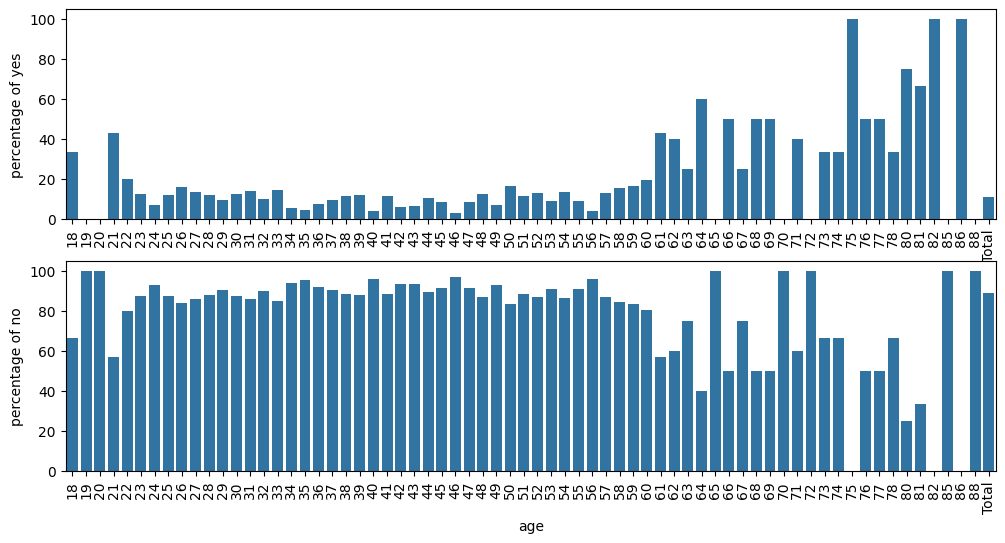

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
sns.barplot(data = pivot, x = 'age', y = 'percentage of yes')
plt.xticks(rotation = 'vertical')
plt.subplot(2,1,2)
sns.barplot(data = pivot, x = 'age', y = 'percentage of no')
plt.xticks(rotation = 'vertical')

In [ ]:
df.groupby('age')['y'].value_counts(normalize = True).unstack(fill_value = 0)

y,no,yes
age,,
18,0.666667,0.333333
19,1.000000,0.000000
20,1.000000,0.000000
21,0.571429,0.428571
22,0.800000,0.200000
...,...,...
81,0.333333,0.666667
82,0.000000,1.000000
85,1.000000,0.000000


In [ ]:
df = pd.read_csv('BankMarketingDataSet.csv', sep = ';')
dict = {'yes':1, 'no':0}
df['y'] = df['y'].map(dict)
df.drop(columns = ['id'],
        inplace = True)
df = df[df['housing'] != 'unknown']
df = df[df['loan'] != 'unknown']
df = df[df['job'] != 'unknown']
df = df[df['marital'] != 'unknown']
df = df[df['education'] != 'unknown']
df = df[df['default'] != 'unknown']

In [ ]:
df

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,-1.1,94.199,-37.5,0.884,4963.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,0


In [ ]:
from sklearn.model_selection import train_test_split
new_df = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns = ['y']),
                                                    new_df['y'],
                                                    test_size = 0.25,
                                                    stratify = new_df['y'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dtc))

0.833117723156533


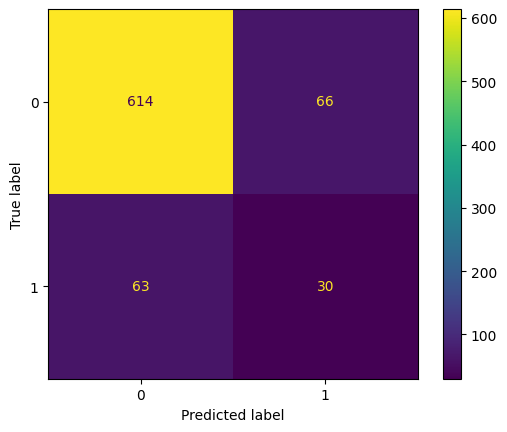

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_dtc, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtc.classes_)
disp.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
pred_neigh = neigh.predict(X_test)
print(accuracy_score(y_test, pred_neigh))

0.8796895213454075


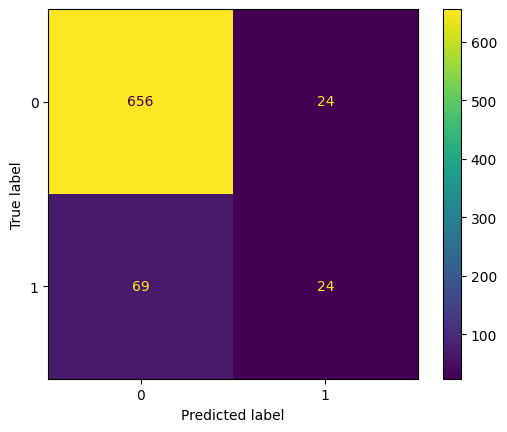

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_neigh, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neigh.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc, new_df.drop(columns = ['y']), new_df['y'], cv = 10).mean())
print(cross_val_score(neigh, new_df.drop(columns = ['y']), new_df['y'], cv = 10).mean())

0.8262135922330096
0.8737864077669902


In [ ]:
numerical_cols = ['emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed',	'y']
numeric = df[numerical_cols]
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(numeric.drop(columns = ['y']),
                                                                                    numeric['y'],
                                                                                    test_size = 0.25,
                                                                                    stratify = numeric['y'])
print(cross_val_score(neigh, numeric.drop(columns = ['y']), numeric['y'], cv = 10).mean())

0.8779935275080906
